In [3]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [4]:
secretnumber = '101011001101'

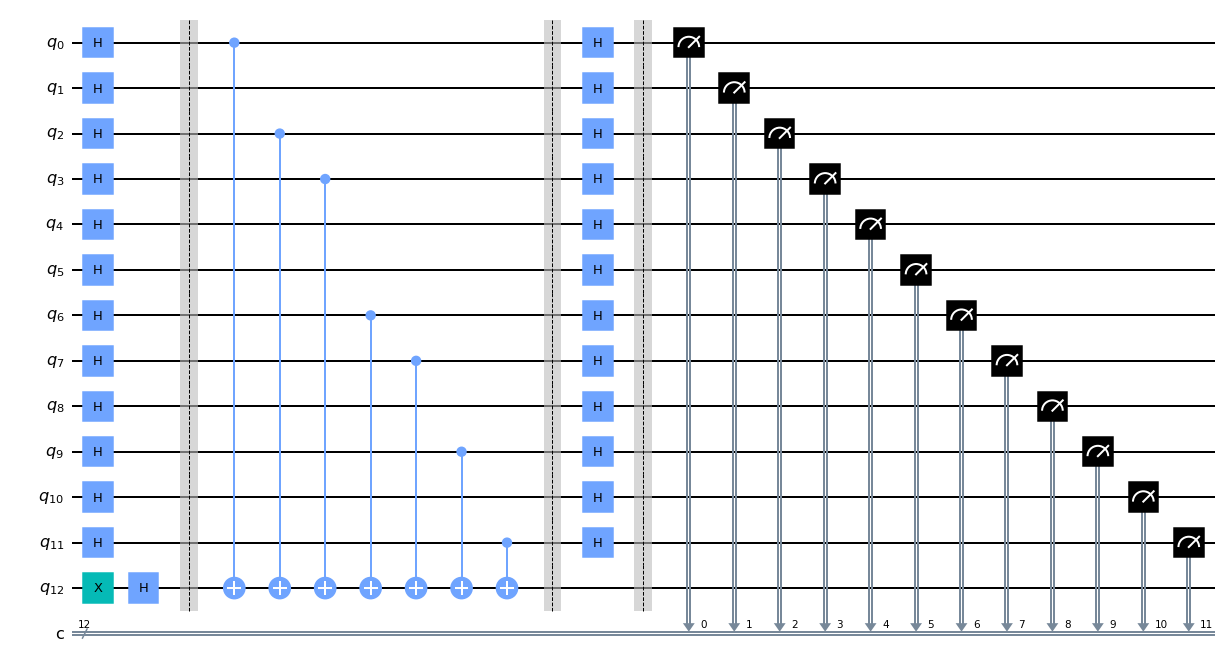

In [5]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.draw(output='mpl')
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for i, v in enumerate(reversed(secretnumber)):
    if v == '1':
        circuit.cx(i, len(secretnumber))
circuit.barrier()

circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output='mpl')

{'101011001101': 1}


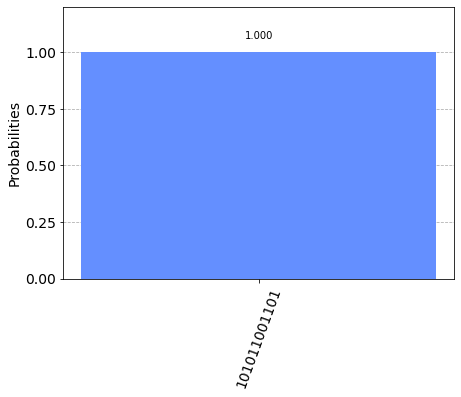

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
# running remotely 

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')#system has max capacity of 5 qubits
job = execute(circuit, backend=qcomp, shots=1)
job_monitor(job)
result = job.result()
counts = result.counts()
print()